In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [10]:
train = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/train_LbELtWX/train.csv')
test = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/test_ScVgIM0/test.csv')

sample_submission = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/sample_submission_I5njJSF.csv')

In [5]:
train.shape

(60000, 2)

In [6]:
test.shape

(10000, 1)

In [11]:
sample_submission.head()

,id,label
0,60001,0
1,60002,0
2,60003,0
3,60004,0
4,60005,0


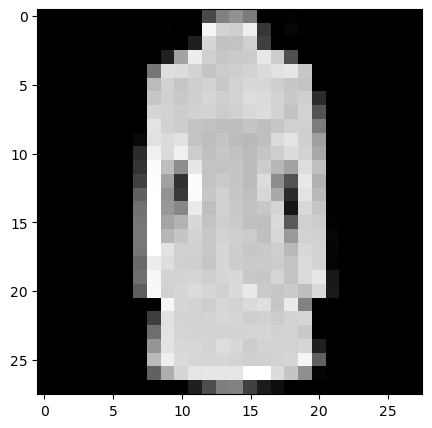

In [20]:
work_path = '/mnt/c/Users/ouyangkang/Desktop/'
seed = 1288
rng = np.random.RandomState(seed)

image_name = rng.choice(train['id'])
file_path = work_path + 'train_LbELtWX/train/' + str(image_name) + '.png'

img = cv2.imread(file_path, 0)
img = img.astype('float32')

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')

In [23]:
img.shape

(28, 28)

In [25]:
data_path = '/mnt/c/Users/ouyangkang/Desktop/train_LbELtWX/train/'

In [36]:
train_x = [cv2.imread(data_path + sample, 0) for sample in os.listdir(data_path)]

In [38]:
train_x = np.asarray(train_x)

In [39]:
train_x.shape

(60000, 28, 28)

In [ ]:
for sample in os.listdir(data_path):
    print(sample)

In [33]:
cv2.imread(data_path + sample, 0)

array([[  0,   0,   0,   1,   0,   0,   0,   0,  24, 116,   0,   0,   0,
          0,   0,   0,   0,   0,  97,  35,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   0,  24, 238, 147, 242, 248, 179, 140,
         64,  60, 121, 188, 237, 235, 200, 183,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  59, 200, 143, 153, 166, 238, 253, 243,
        172, 169, 234, 248, 230, 145, 130, 177, 208,  77,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  24, 224,  79,  25, 167, 104, 169, 209, 235,
        255, 255, 232, 214, 151, 163, 153,  71,  72, 253,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 153, 163,  51, 127, 101, 154, 131, 113, 125,
        221, 221, 151,  80, 108,  87,  81, 133,  43, 130, 135,  11,   0,
          0,   0],
       [  0,   0,   0,  71, 161, 142,  38, 137, 104, 125, 158, 166,  88,
         67, 104, 117, 142, 156, 121, 127, 133, 113, 140,  79, 131,   0,
          0,   0],
       [  